In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '../data/regression_data.xls'
df = pd.read_excel(filename, header=0)

print(df.shape)
print (df.head(10))

(21597, 21)
           id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   
5  7237550310 2014-05-12         4       4.50         5420    101930     1.0   
6  1321400060 2014-06-27         3       2.25         1715      6819     2.0   
7  2008000270 2015-01-15         3       1.50         1060      9711     1.0   
8  2414600126 2015-04-15         3       1.00         1780      7470     1.0   
9  3793500160 2015-03-12         3       2.50         1890      6560     2.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3 

In [3]:
df


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
df.drop(labels='date', axis=1) #drop the column date

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [5]:
df.shape[0] #number of rows of data

21597

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [7]:

bedrooms=df.bedrooms.unique()
bedrooms


array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [8]:
print('Unique values in bedrooms: ' + str(bedrooms.size))



Unique values in bedrooms: 12


In [9]:
bathrooms=df.bathrooms.unique()
bathrooms
print('Unique values in bathrooms: ' + str(bathrooms.size))

Unique values in bathrooms: 29


In [10]:
floors=df.floors.unique()
floors
print('Unique values in floors: ' + str(floors.size))


Unique values in floors: 6


In [11]:
condition=df.condition.unique()
condition
print('Unique values in condition: ' + str(condition.size))

Unique values in condition: 5


In [12]:
grade=df.grade.unique()
grade
print('Unique values in grade: ' + str(grade.size))

Unique values in grade: 11


In [13]:
dfordenado = df.sort_values(by="price", ascending=False) #5
dfordenado.head(10).id


7245    6762700020
3910    9808700762
9245    9208900037
4407    2470100110
1446    8907500070
1313    7558700030
1162    1247600105
8085    1924059029
2624    7738500731
8629    3835500195
Name: id, dtype: int64

In [14]:
#6
#average price
print('The average price is: ')
df["price"].mean()

The average price is: 


540296.5735055795

In [15]:
#7 
be=df.groupby(['bedrooms'])
be["price"].mean().to_frame("Average Price")

,Average Price
bedrooms,
1,3.182395e+05
2,4.013877e+05
3,4.662766e+05
4,6.355647e+05
5,7.868741e+05
6,8.258535e+05
7,9.514478e+05
8,1.105077e+06
9,8.939998e+05


In [16]:
be["sqft_living"].mean().to_frame("Average sqft_living")


,Average sqft_living
bedrooms,
1,888.153061
2,1239.752899
3,1805.837235
4,2554.649666
5,3047.545284
6,3284.341912
7,3974.210526
8,3800.000000
9,3775.000000


In [17]:
w=df.groupby(['waterfront'])
w["price"].mean().to_frame('Average Price')


,Average Price
waterfront,
0,5.317623e+05
1,1.662524e+06


In [18]:
df['condition'].corr(df['grade'])




-0.14689580091008858

<AxesSubplot:xlabel='condition', ylabel='grade'>

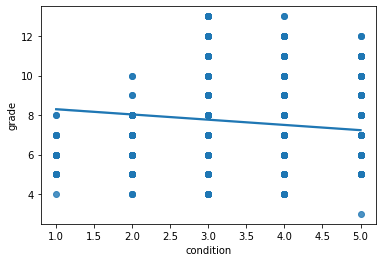

In [19]:

col1=df['condition']
col2=df['grade']

sns.regplot(x=col1, y=col2)